<a href="https://colab.research.google.com/github/NadhemBenhadjali/DataQuest-Frippe-Problem/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***DataQuest Frippe Problem***

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import math
cfrom sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Loading and Preprocessing

In [ ]:
from pycaret.regression import setup, compare_models


In [ ]:
# !pip install pycaret

In [ ]:
# Loading the dataset
train =pd.read_csv("/content/drive/MyDrive/dataquest/data.csv")
test =pd.read_csv("/content/drive/MyDrive/dataquest/test.csv")
Sub=pd.read_csv("/content/drive/MyDrive/dataquest/sample_submission.csv")

In [ ]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (48548, 11)
test data shape : (5395, 10)


In [ ]:
train.isna().sum()

ID        0
marka     0
naw3      0
9at3a     0
khochn    0
toul      0
3ordh     0
R         0
G         0
B         0
soum      0
dtype: int64

No missing values !

In [ ]:
for i in train.columns:
    print(train[i].value_counts())

ID
48547    1
0        1
1        1
2        1
48508    1
        ..
7        1
8        1
9        1
10       1
11       1
Name: count, Length: 48548, dtype: int64
marka
HA         19349
Armani     12427
Zen        10925
Bey&Bey     4398
Kontakt     1449
Name: count, dtype: int64
naw3
sport           10126
confy            8850
mta3 a3res       8599
posé             7449
mta3 kolyoum     6119
formel           4867
classy           2538
Name: count, dtype: int64
9at3a
maryoul    11794
sabbat     11026
serwel      8291
t-shirt     7329
kabbout     4557
jacket      3293
socks       1607
hoodie       651
Name: count, dtype: int64
khochn
1.033333    2009
1.031667    1923
1.030000    1871
1.036667    1833
1.035000    1805
            ... 
0.905000       1
0.890000       1
0.911667       1
1.196667       1
1.226667       1
Name: count, Length: 181, dtype: int64
toul
24.0     2335
80.8     2020
24.8     2013
56.0     1768
25.6     1663
         ... 
292.0       1
259.2       1
248.8       1
2

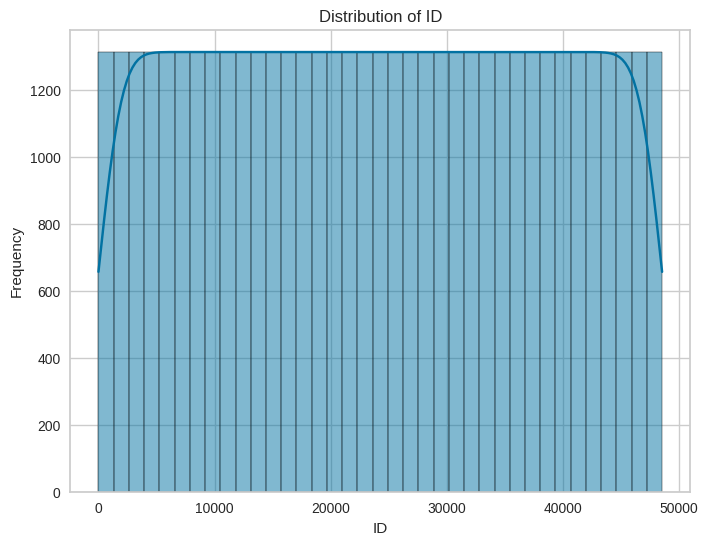

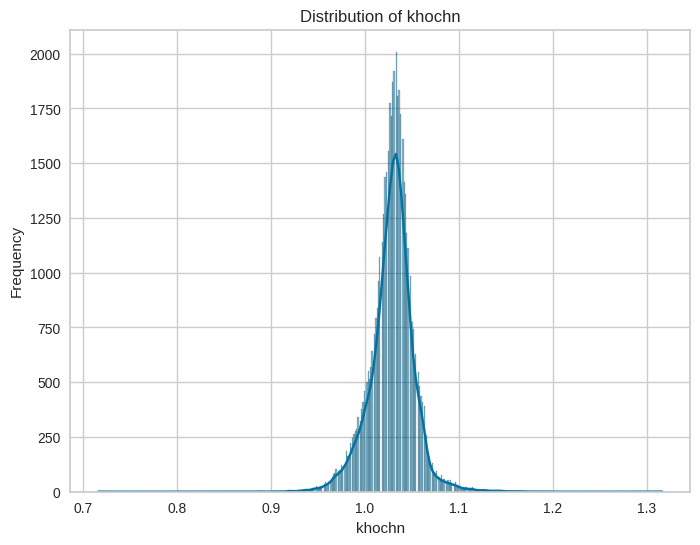

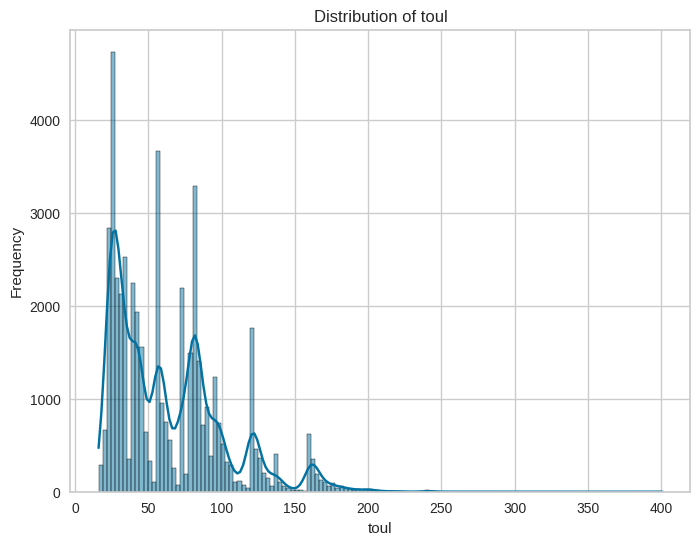

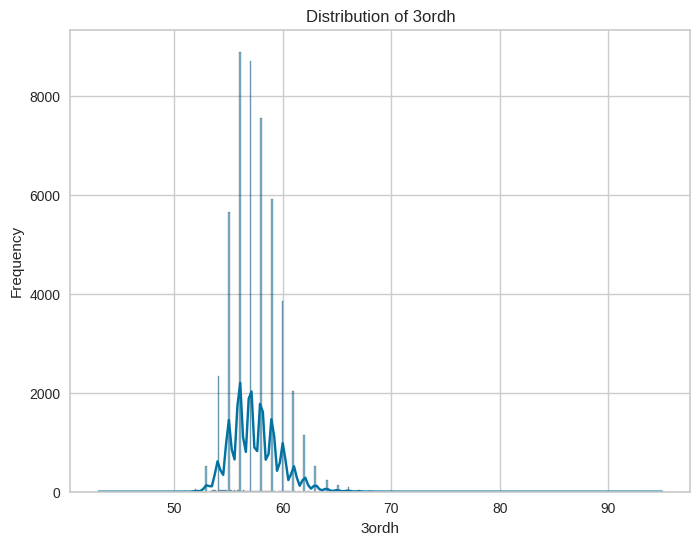

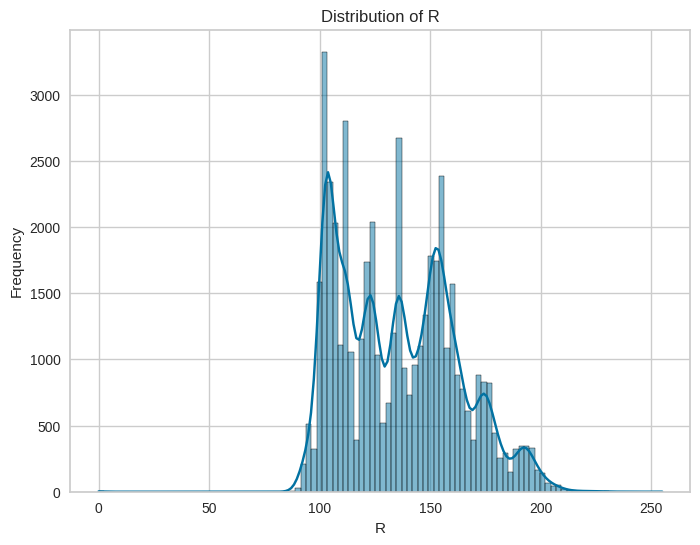

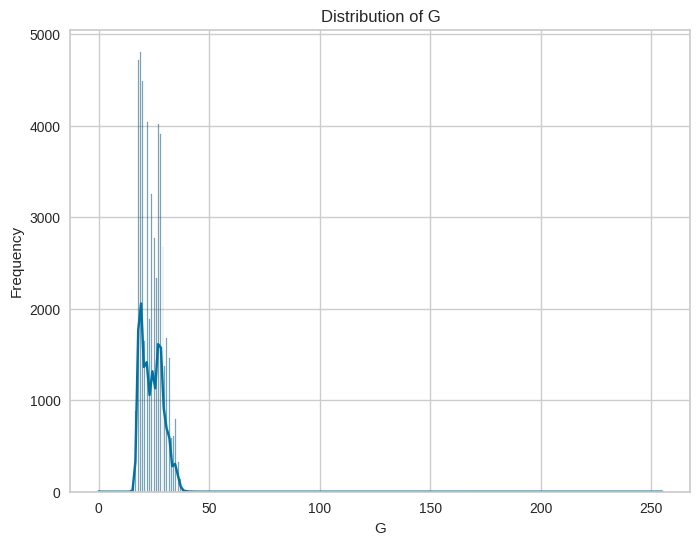

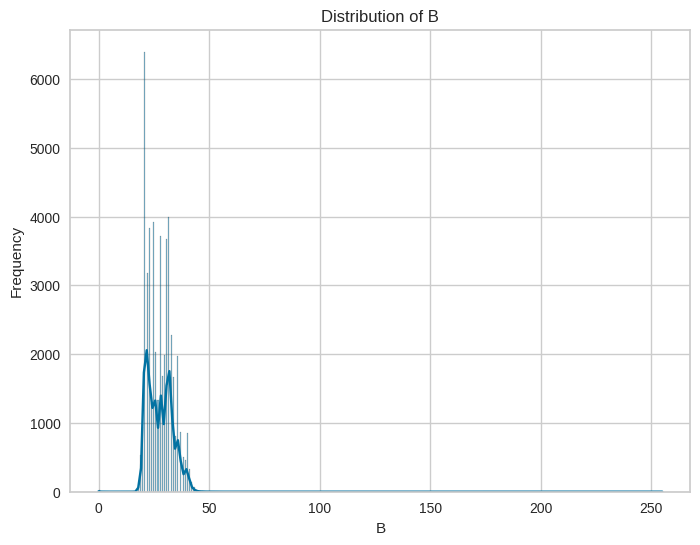

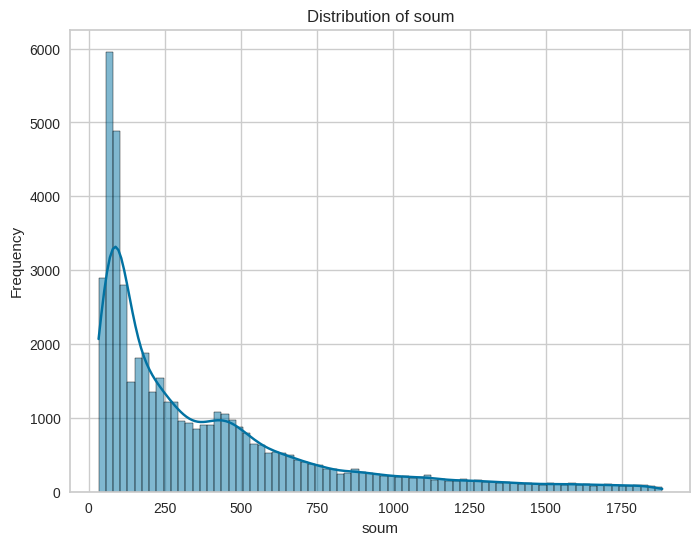

In [ ]:
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

# Step 3: Visualize distributions
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# **Distributions**

In [ ]:
train1=train.copy()
test1=test.copy()

['marka', 'naw3', '9at3a']


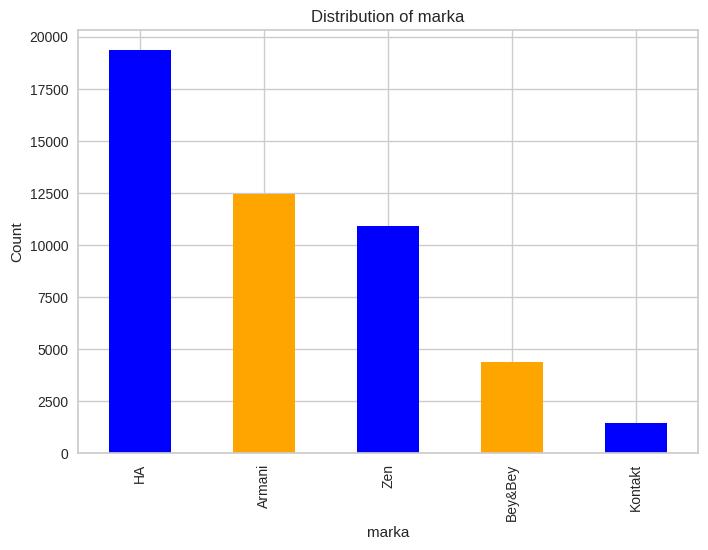

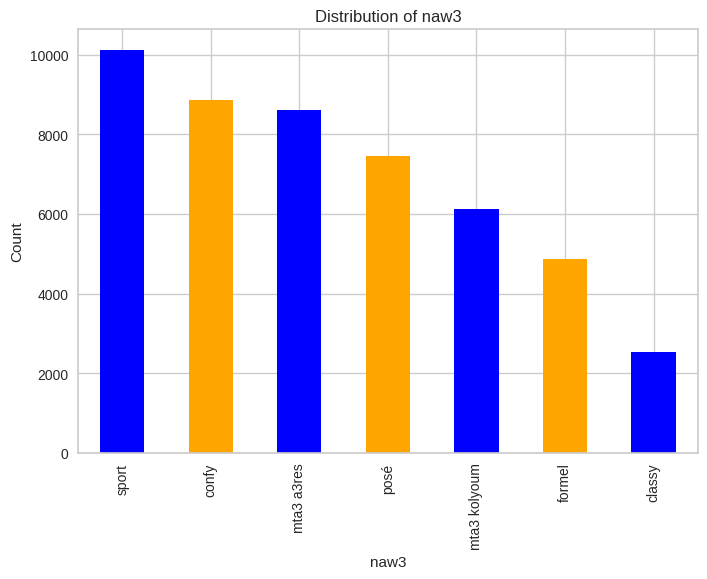

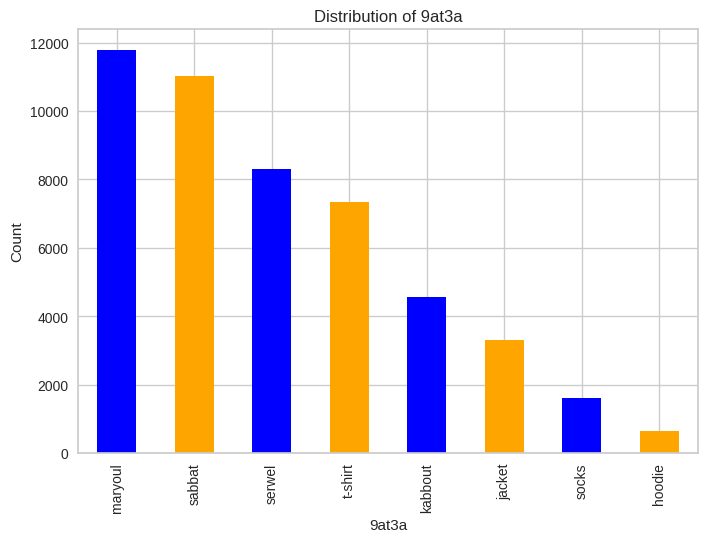

In [ ]:
colu = ['marka', 'naw3', '9at3a',]
print(colu)
for i in colu:
    train[i].value_counts().plot(kind='bar', color=['blue', 'orange'])
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()


We can observe that the location_type is unbalanced.

To address the issue of unbalanced location types, let's apply oversampling.

In [ ]:
id0=train1['ID']
id1=test1['ID']
train1.drop('ID', axis=1, inplace=True)
test1.drop('ID', axis=1, inplace=True)
cols=list(train.select_dtypes(exclude=['float', 'int']).columns)
print(cols)


['marka', 'naw3', '9at3a']


In [ ]:
L1=[list(train[i].value_counts().index) for i in cols]
label_encoder = preprocessing.LabelEncoder()
for i in  cols:
  train1[i] = label_encoder.fit_transform(train[i])
  test1[i] = label_encoder.fit_transform(test[i])
train1.dtypes

marka       int64
naw3        int64
9at3a       int64
khochn    float64
toul      float64
3ordh     float64
R           int64
G           int64
B           int64
soum      float64
dtype: object

In [ ]:
L=[train[i].value_counts().index for i in cols ]
category_dict = {cols[i]:{L[i][j]:L1[i][j] for j in range(len(L1[i]))} for i in range(len(L))}
print(category_dict)

{'marka': {'HA': 'HA', 'Armani': 'Armani', 'Zen': 'Zen', 'Bey&Bey': 'Bey&Bey', 'Kontakt': 'Kontakt'}, 'naw3': {'sport': 'sport', 'confy': 'confy', 'mta3 a3res': 'mta3 a3res', 'posé': 'posé', 'mta3 kolyoum': 'mta3 kolyoum', 'formel': 'formel', 'classy': 'classy'}, '9at3a': {'maryoul': 'maryoul', 'sabbat': 'sabbat', 'serwel': 'serwel', 't-shirt': 't-shirt', 'kabbout': 'kabbout', 'jacket': 'jacket', 'socks': 'socks', 'hoodie': 'hoodie'}}


# **Model selection and trainings**

In [ ]:
test2=test1.copy()
train2=train1.copy()
train2

,marka,naw3,9at3a,khochn,toul,3ordh,R,G,B,soum
0,1,3,2,1.081667,22.4,57.0,98,18,21,49.2
1,2,1,4,1.038333,46.4,54.0,128,23,27,180.9
2,4,1,3,1.021667,40.8,54.0,121,22,25,143.8
3,1,1,3,1.065000,24.8,56.0,101,18,21,54.4
4,0,0,2,1.041667,72.0,61.0,146,26,30,345.9
...,...,...,...,...,...,...,...,...,...,...
48543,0,2,5,1.028333,94.4,58.0,160,29,33,455.5
48544,0,4,4,1.000000,80.8,59.0,155,28,31,750.8
48545,0,6,4,1.036667,46.4,58.0,127,23,26,229.7
48546,2,3,4,1.031667,24.8,55.0,103,19,21,75.7


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
y_train=train2["soum"]
train2.dropna(subset=['soum'], inplace=True)

train2.drop('soum', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train2, y_train, test_size=0.2, random_state=20)

In [ ]:
train2

,marka,naw3,9at3a,khochn,toul,3ordh,R,G,B
0,1,3,2,1.081667,22.4,57.0,98,18,21
1,2,1,4,1.038333,46.4,54.0,128,23,27
2,4,1,3,1.021667,40.8,54.0,121,22,25
3,1,1,3,1.065000,24.8,56.0,101,18,21
4,0,0,2,1.041667,72.0,61.0,146,26,30
...,...,...,...,...,...,...,...,...,...
48543,0,2,5,1.028333,94.4,58.0,160,29,33
48544,0,4,4,1.000000,80.8,59.0,155,28,31
48545,0,6,4,1.036667,46.4,58.0,127,23,26
48546,2,3,4,1.031667,24.8,55.0,103,19,21


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor  # Add this import

# Assuming you have X_train, X_test, y_train, y_test defined
# Also, assuming you have initialized the StandardScaler
scaler = StandardScaler()

# Initialize models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('KNN Regressor', KNeighborsRegressor()),  # Add KNeighborsRegressor
    ('XGBoost', XGBRegressor()),
    ('CatBoost', CatBoostRegressor()),
    ('LGBM', LGBMRegressor())  # Add LGBMRegressor
]

# Initialize results dictionary
results = {}

# Initialize cross-validation scoring
cv_scoring = 'r2'

# Train and evaluate each model using cross-validation
for name, model in models:
    # Scale the features if needed
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Combine training and test sets for cross-validation
    X_combined = np.vstack((X_train_scaled, X_test_scaled))
    y_combined = np.concatenate((y_train, y_test))

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_combined, y_combined, scoring=cv_scoring, cv=5)

    # Store average cross-validation score
    results[name] = np.mean(cv_scores)

# Print leaderboard
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("Leaderboard based on Cross-Validated R2 score:")
for name, cv_r2 in sorted_results:
    print(f"{name}: Average CV R2 Score = {cv_r2:.4f}")

# Choose the best model
best_model_name, best_cv_r2 = sorted_results[0]
best_model = next(model for model_name, model in models if model_name == best_model_name)

print(f"\nBest Model: {best_model_name}, Average CV R2 Score: {best_cv_r2:.4f}")


In [ ]:
pip install scikit-optimize


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for CatBoost
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],  # Adjust values based on your preference
    'depth': [4, 8],  # Adjust values based on your preference
    'l2_leaf_reg': [1, 5],  # Adjust values based on your preference
}

# Initialize CatBoostRegressor model
model = CatBoostRegressor()

# Initialize GridSearchCV with the CatBoostRegressor model and parameter grid
grid_search = GridSearchCV(
    model,
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the grid search to the data
grid_rf=grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R2 Score:", best_score)


In [ ]:
from lightgbm import LGBMRegressor

# Define hyperparameters grid for LGBMRegressor
lgbm_param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize LGBMRegressor model
lgbm_model = LGBMRegressor()

# Initialize GridSearchCV with the LGBMRegressor model and parameter grid
lgbm_grid_search = GridSearchCV(
    lgbm_model,
    lgbm_param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the grid search to the data
grid_lgbm = lgbm_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score for LGBMRegressor
best_params_lgbm = lgbm_grid_search.best_params_
best_score_lgbm = lgbm_grid_search.best_score_

print("Best Parameters (LGBM):", best_params_lgbm)
print("Best R2 Score (LGBM):", best_score_lgbm)


In [ ]:
from xgboost import XGBRegressor

# Define hyperparameters grid for XGBRegressor
xgb_param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize XGBRegressor model
xgb_model = XGBRegressor()

# Initialize GridSearchCV with the XGBRegressor model and parameter grid
xgb_grid_search = GridSearchCV(
    xgb_model,
    xgb_param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the grid search to the data
grid_xgb = xgb_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score for XGBRegressor
best_params_xgb = xgb_grid_search.best_params_
best_score_xgb = xgb_grid_search.best_score_

print("Best Parameters (XGBoost):", best_params_xgb)
print("Best R2 Score (XGBoost):", best_score_xgb)


In [ ]:
model1 = grid_search.best_estimator_
model2= xgb_grid_search.best_estimator_
model3=lgbm_grid_search.best_estimator_

from sklearn.ensemble import VotingRegressor

# Create an ensemble of the three best models
ensemble_model = VotingRegressor(
    estimators=[
        ('Model 1', model1),
        ('Model 2', model2),
        ('Model 3', model3)
    ],
    weights=[1, 1, 1]  # You can adjust the weights based on your preference
)

# Fit the ensemble model on the training set
ensemble_model.fit(X_train_scaled, y_train)

# Evaluate the ensemble model on the test set
ensemble_score = ensemble_model.score(X_test_scaled, y_test)
print("Ensemble Model R2 Score on Test Set:", ensemble_score)

# Perform cross-validation with the ensemble model
ensemble_cv_scores = cross_val_score(ensemble_model, X_train_scaled, y_train, scoring='r2', cv=5)
print("Ensemble Model Cross-Validation Results:")
print("Average Cross-Validated R2 Score:", np.mean(ensemble_cv_scores))




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Initialize MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', alpha=0.0001, max_iter=1000)

# Fit the MLPRegressor to the training data
mlp_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the performance on the test set
test_score_mlp = r2_score(y_test, y_pred_mlp)

print("R2 Score on Test Set (MLP):", test_score_mlp)


# **Submission**

In [ ]:
# Make predictions on the test set
test2_scaled = scaler.transform(test2)
y_pred = best_model.predict(test2_scaled)

# Create submission DataFrame
submission = pd.DataFrame({"ID": id1 ,
                           "soum": y_pred})

# Save submission to a CSV file
submission.to_csv('/content/drive/MyDrive/dataquest/SampleSubmission2.csv', index=False)
